#### import libraries

In [1]:
import pandas as pd 

#### load data

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")

#### check name and data types 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape[0]

205

In [6]:
df.shape[1]

26

#### check duplicates

In [7]:
df.duplicated().sum()

0

no duplicates

#  --------------------     get object columns

In [8]:
#get the object columns only

newdf1=df.select_dtypes(include=object )

In [9]:
# n of columns
newdf1.shape[1]

10

In [10]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CarName         205 non-null    object
 1   fueltype        205 non-null    object
 2   aspiration      205 non-null    object
 3   doornumber      205 non-null    object
 4   carbody         205 non-null    object
 5   drivewheel      205 non-null    object
 6   enginelocation  205 non-null    object
 7   enginetype      205 non-null    object
 8   cylindernumber  205 non-null    object
 9   fuelsystem      205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


In [11]:
newdf1.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# -------------------- plots 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

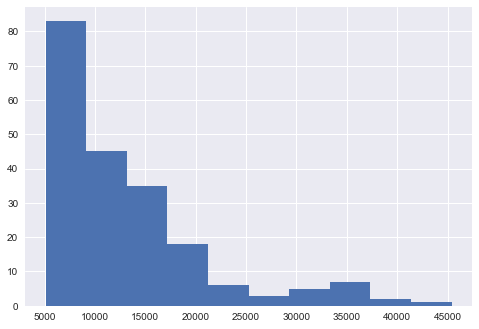

In [20]:
#plot price column
plt.hist(df["price"])
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

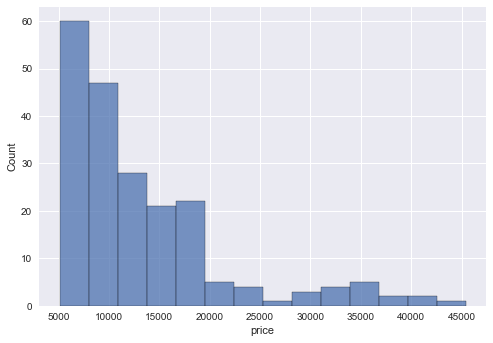

In [21]:
sns.histplot(df["price"])

1- histogram used for counting values, numbers 
2- histogram is right skewed : because as the price increase , counts of cars decrease 

In [14]:
#to know more details about price
df["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

# ---------------show different frequencies of different symbolying

In [15]:
#get the two columns then take car first name in new dataframe
newdf31=df[["CarName" ,"price"]].copy()
newdf31["name"]=newdf31["CarName"].str.split(" ").str[0]
newdf31.head()

,CarName,price,name
0,alfa-romero giulia,13495.0,alfa-romero
1,alfa-romero stelvio,16500.0,alfa-romero
2,alfa-romero Quadrifoglio,16500.0,alfa-romero
3,audi 100 ls,13950.0,audi
4,audi 100ls,17450.0,audi


In [16]:
#done changes in excell sheet to facilate calculations like change vw to volkswagen , maxda to mazda , etc.
#count the number of cars in each company
newdf31.value_counts("name")#.keys()

name
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
porcshce        1
dtype: int64

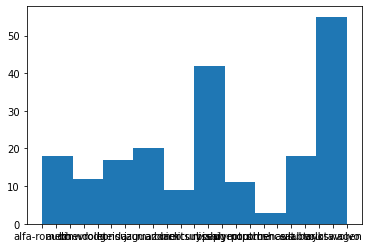

In [17]:
plt.hist(newdf31["name"])
#plt.style.use('seaborn')
#plt.figure(figsize=(5000000,30000))
#sns.barplot(x="name" , y=count, data=newdf31)
plt.show()

# -------------------- fuel type & price 

In [18]:
df["fueltype"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fueltype, Length: 205, dtype: object

<AxesSubplot:xlabel='price', ylabel='fueltype'>

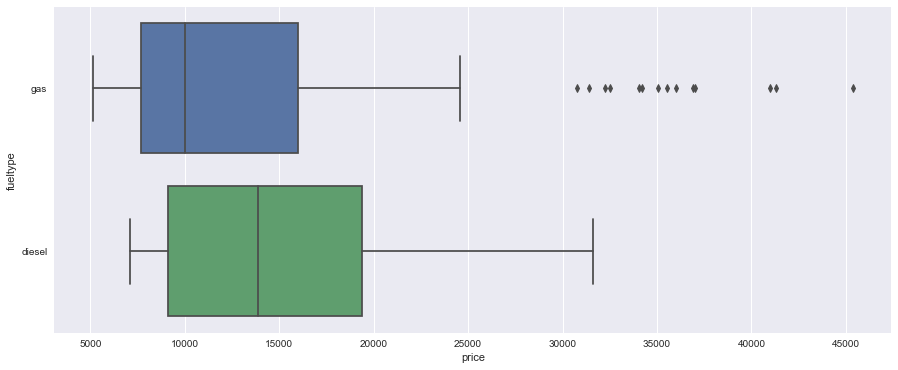

In [19]:
plt.style.use('seaborn')
plt.figure(figsize=(15,6))
sns.boxplot(x="price" , y="fueltype" , data=df)

dissel has higher prices 

# ----------------- correlation between columns 